# Part I - (Dataset Exploration : Flights dataset)
## by (Nourhene Aouidi)

## Introduction


This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 1987 to 2008. i used  2008 datset


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('2008.csv')

In [3]:
df.head(2170000)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169995,2008,4,10,4,NaN,1433,NaN,1545,MQ,3268,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
2169996,2008,4,11,5,1520.0,1433,1628.0,1545,MQ,3268,...,8.0,9.0,0,NaN,0,4.0,0.0,0.0,0.0,39.0
2169997,2008,4,12,6,1428.0,1433,1539.0,1545,MQ,3268,...,12.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2169998,2008,4,13,7,1426.0,1433,1532.0,1545,MQ,3268,...,8.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

### What is the structure of your dataset?

> 2389217 rows x 29 columns

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest in the Airline On-Time Performance Data are the flight arrival and departure times, flight delays, cancellations, diversions, and the causes of those delays and cancellations. These features are important for understanding airline performance

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> features that impact on-time performance, such as weather, airport congestion, and airline operations. 

## Univariate Exploration



### how the flights delays are distributed ?

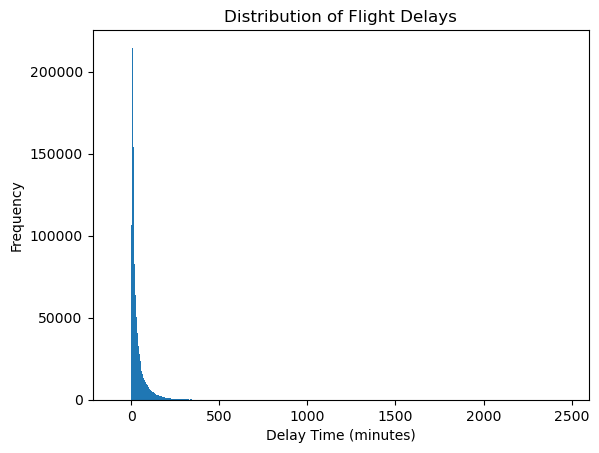

In [5]:
# Filter for flights with positive arrival delay times
delayed_flights = df[df["ArrDelay"] > 0]
bins = np.arange(df.DepDelay.min(),df.DepDelay.max()+5,5)
# Create a histogram of the delay times
plt.hist(delayed_flights["ArrDelay"], bins)
plt.title("Distribution of Flight Delays")
plt.xlabel("Delay Time (minutes)")
plt.ylabel("Frequency")
plt.show()

the plot is  skewed to the left which  would suggest shorter delays. 

### what is the frequency of flights cancellations ?

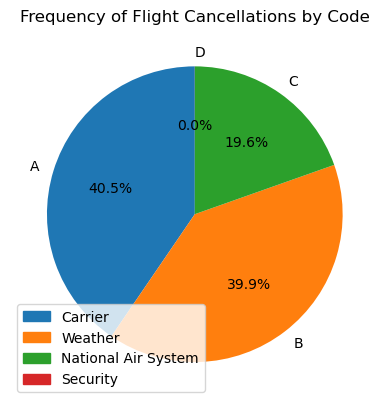

In [6]:
# Define the colors for each cancellation code
colors = {'A': 'tab:blue', 'B': 'tab:orange', 'C': 'tab:green', 'D': 'tab:red'}

# Group flights by cancellation code and count the number of occurrences
cancellations = df["CancellationCode"].value_counts()

# Create a pie chart of the cancellations by code
plt.pie(cancellations, labels=cancellations.index, colors=[colors[i] for i in cancellations.index],
        autopct='%1.1f%%', startangle=90)
plt.title("Frequency of Flight Cancellations by Code")

# Add the key of the code to the plot
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in cancellations.index]
labels = ['Carrier', 'Weather', 'National Air System', 'Security']
plt.legend(handles, labels)

plt.show()

The carrier is the number one cause for flight cancellation, shortly followed by the weather. The gap in between both of them is  very close. NAS is the third highest reason for flight cancellation. No flight cancellations have been reported because of security. I assume that security is good in this airline and we can not controle the weather .



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

The resulting plot  show the frequency of cancellations by code and include a key that identifies each code.

### Which month/s occur more cancellation

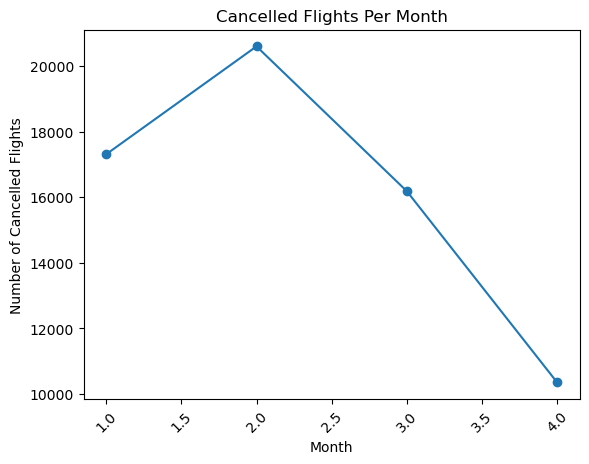

In [7]:
# Filter to include only cancelled flights and count the number of cancellations per month
df_cancelled = df[df["Cancelled"] == 1]
df_cancelled_count = df_cancelled.groupby("Month")["Cancelled"].count()

# Create a line plot of the cancelled flights by month
plt.plot(df_cancelled_count.index, df_cancelled_count, marker='o')

# Add labels and title
plt.xlabel("Month")
plt.ylabel("Number of Cancelled Flights")
plt.title("Cancelled Flights Per Month")

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

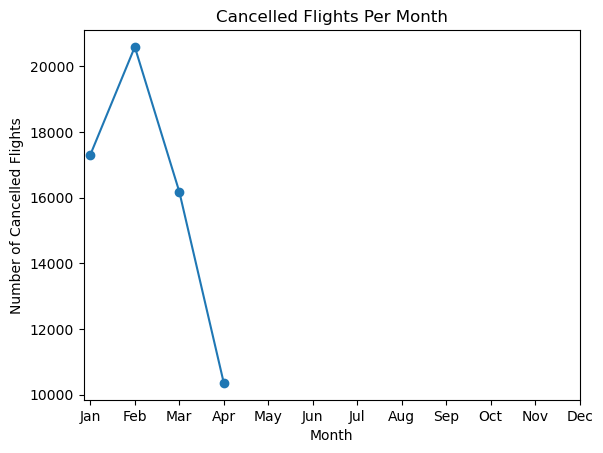

In [8]:
# Filter to include only cancelled flights and count the number of cancellations per month
df_cancelled = df[df["Cancelled"] == 1]
df_cancelled_count = df_cancelled.groupby("Month")["Cancelled"].count()

# Create a line plot of the cancelled flights by month
plt.plot(df_cancelled_count.index, df_cancelled_count, marker='o')

# Add labels and title
plt.xlabel("Month")
plt.ylabel("Number of Cancelled Flights")
plt.title("Cancelled Flights Per Month")

# Set the x-axis tick locations and labels
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> i have a trouble seeing all the months in this visualisation, it's likely i thought the x-axis labels are too crowded or overlapping with each other. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> i tried  to adjust the x-axis tick locations and labels to be more spaced out or to rotate the labels. but the problem persist , i found out that we have just data from janyary to april .

### which airline has the most traffic

In [9]:

def count_plot (data,var):
    '''
    a function takes dataset and value of interest and gives a seaborn countplot in descending order
    
    '''
    #arrang the varkiable in descending order
    w=data[var].value_counts().index
    #figure size
    plt.figure(figsize = [12, 8])
    base_color=sb.color_palette()[0]

    sb.countplot(data=data,x=var,color=base_color,order=w)
    #rotate x-axis values by 90°
    plt.xticks(rotation=90)


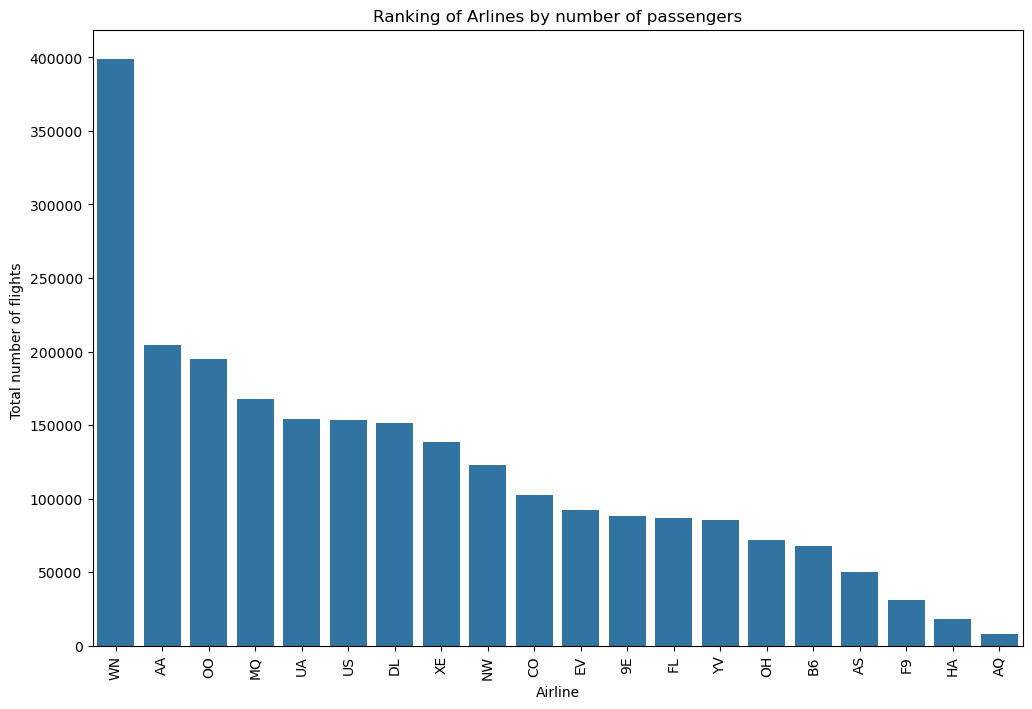

In [10]:
#use count_plot function to do seaborn countplot
count_plot(df,'UniqueCarrier')

plt.xlabel('Airline')
plt.ylabel('Total number of flights ')
plt.title('Ranking of Arlines by number of passengers');

Southwest Airline(WN) has the most air traffic compared to all of the carriers in the dataset. It has ~1.4 million flight for the year of 2018. Followd by Delta airlines(DL). Virgin Airline is in the bottom of the list, and the reason is becuase it does not fly for many states.

### which day of the week has the most flights ? 

Text(0.5, 1.0, 'Number of passengers per day')

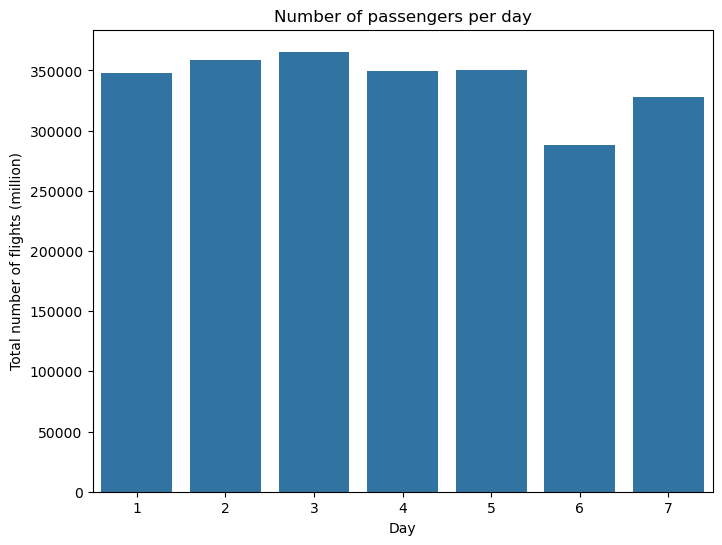

In [31]:
base_color=sb.color_palette()[0]

# Define the order of the categories
day_order = [1, 2, 3, 4, 5, 6, 7]

# Create the count plot with the ordered categories
plt.figure(figsize=(8, 6))
sb.countplot(data=df, x='DayOfWeek',color=base_color, order=day_order)

# Set the x-axis label and title
plt.xlabel('Day')
plt.ylabel('Total number of flights (million)')
plt.title('Number of passengers per day')





I wanted to know if there is a  difference between the number of filghts and  the day of the week and I found out  that the number of trips on the weekend is a little bit less than on the working days


## Bivariate Exploration



### Distance/AirTime vs Delay


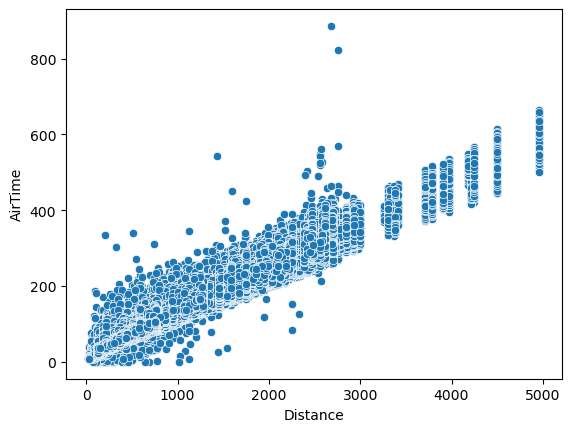

In [12]:
sb.scatterplot(data=df, x="Distance", y="AirTime");


we can see a linear relationship

### does the distance has impact on the arrivdelay ?

<AxesSubplot:xlabel='Distance', ylabel='ArrDelay'>

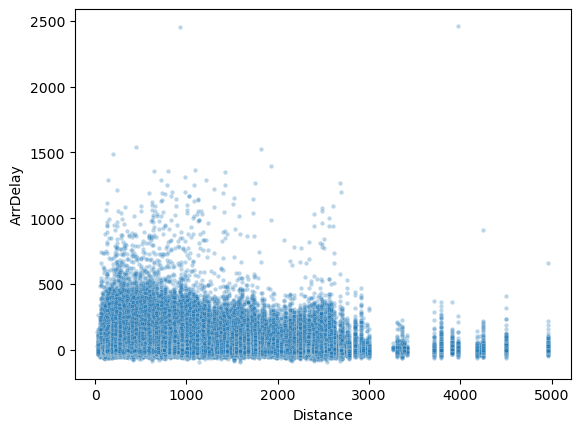

In [22]:
sb.scatterplot(data=df, x="Distance", y="ArrDelay", alpha=0.3, s=10)


distance has no impact on ArrDelay

### departure delay time durring the week

Text(0.5, 1.0, 'Average departure delay time durring the week')

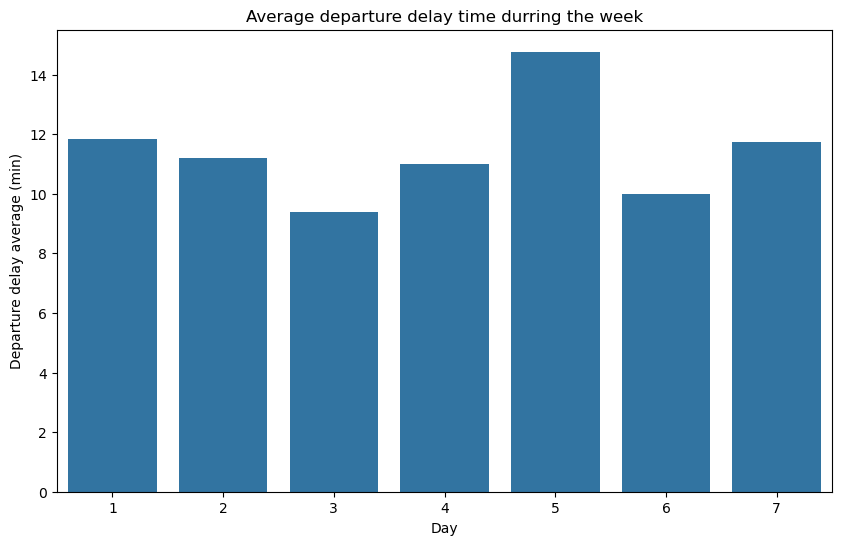

In [14]:

day_delay=df.groupby('DayOfWeek')['DepDelay'].mean()
day_delay=day_delay.reset_index()
plt.figure(figsize = [10, 6])
base_color=sb.color_palette()[0]

sb.barplot(data=day_delay,x='DayOfWeek',y='DepDelay',color=base_color)
plt.ylabel('Departure delay average (min)')
plt.xlabel('Day')
plt.title('Average departure delay time durring the week')


 work day has much delay then Sunday



<AxesSubplot:xlabel='DayOfWeek', ylabel='DepDelay'>

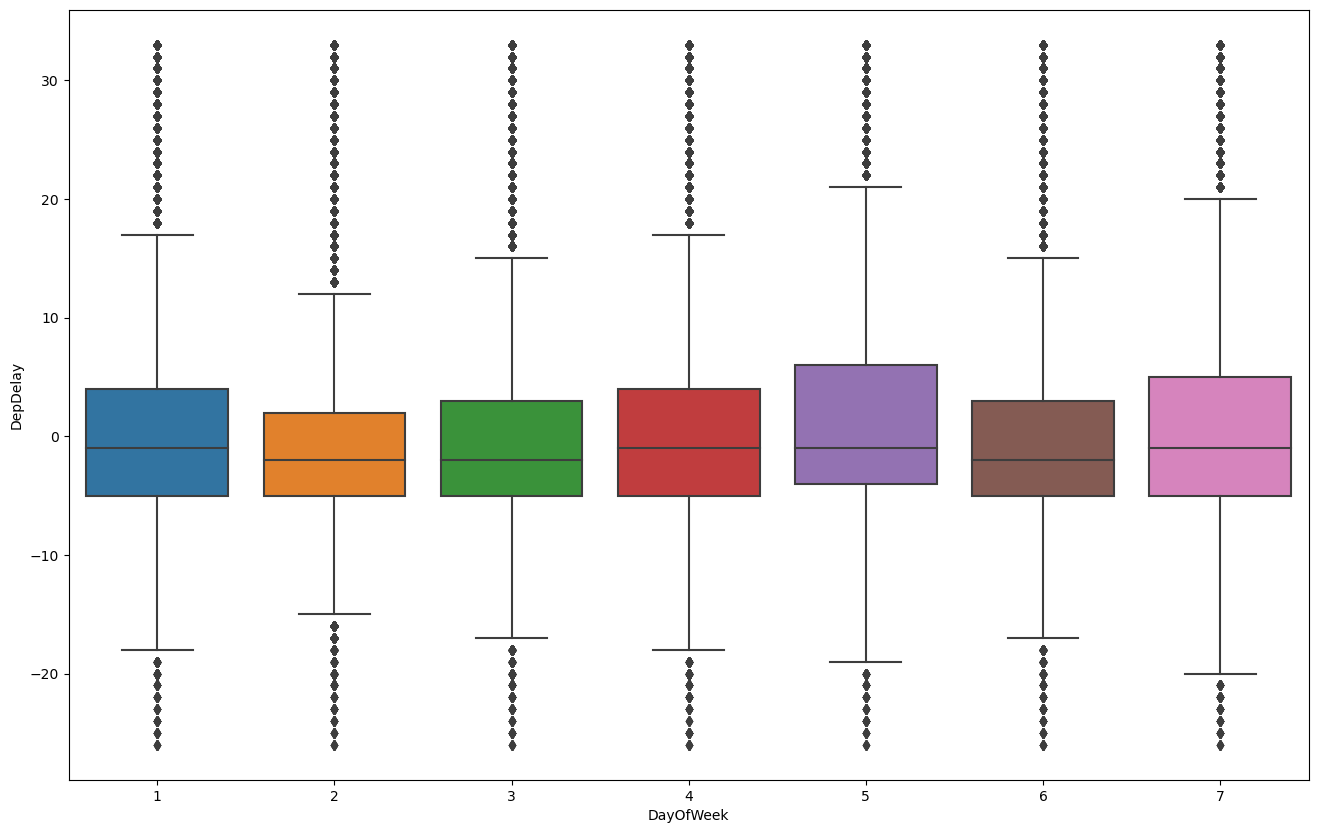

In [23]:
Q1 = df['DepDelay'].quantile(0.25)
Q3 = df['DepDelay'].quantile(0.75)
IQR = Q3 - Q1

# Set lower and upper bounds to filter out outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe to remove outliers
df_filtered = df[(df['DepDelay'] >= lower_bound) & (df['DepDelay'] <= upper_bound)]

# Plot the boxplot with the filtered dataframe
plt.figure(figsize=(16,10))
sb.boxplot(data=df_filtered, x='DayOfWeek', y='DepDelay')


Thrusday and Tuesday are best days to travel, Flights on theses two days usually take off on the exact time or even sooner than expected. On the other hand Friday and Monday has the most departure daleys and some times the delay take longer time.

### the relation between airline and  DepDelay


<AxesSubplot:xlabel='Origin', ylabel='DepDelay'>

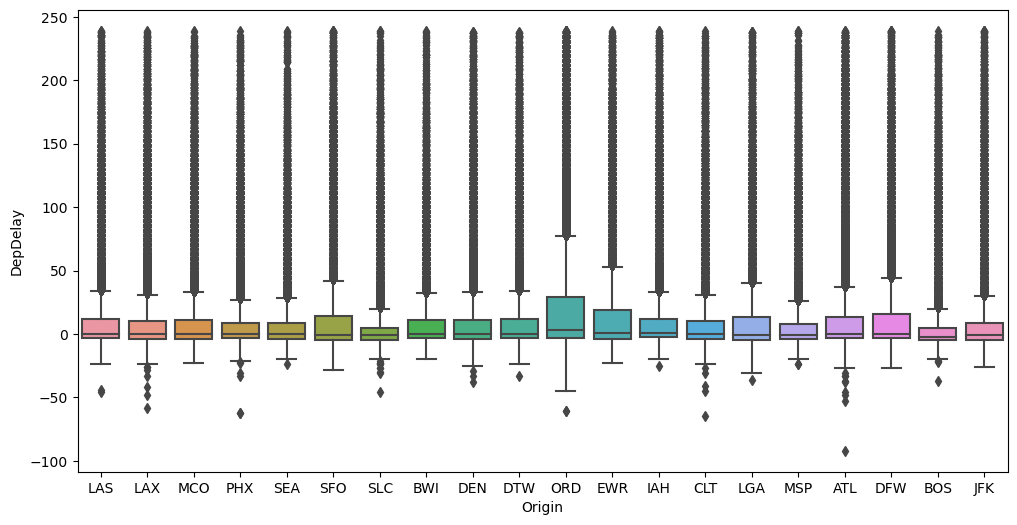

In [16]:
top20_ind = df.Origin.value_counts().head(20).index
top20 = df.loc[df.Origin.isin(top20_ind)]

mask  = top20.DepDelay < 240
plt.figure(figsize=(12,6))
sb.boxplot(data=top20.loc[mask], x="Origin", y="DepDelay")

Upon examining the boxplot for flights departing from these airports with delays under 2 hours, it appears that the median delay times are similar across all airports, except for flights departing from ORD, which have a slightly higher median delay and a wider interquartile range (IQR). However, due to the abundance of outliers in the data, it is difficult to draw meaningful conclusions from the plot.

### The Percentage of cancelled Flight in each airline between companies

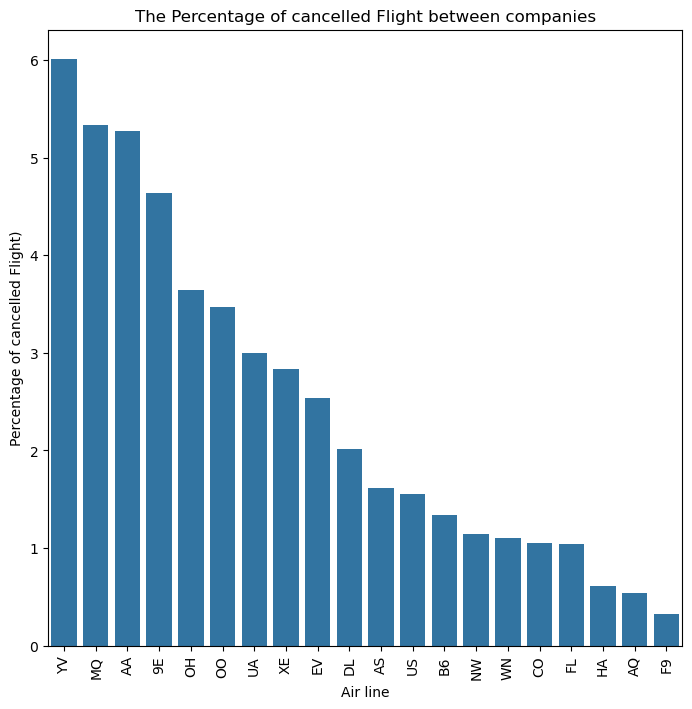

In [17]:
cancelled=df.groupby('UniqueCarrier')['Cancelled'].mean()
#to make cancelled a datafram
cancelled=cancelled.reset_index()
#multiplie by 100 to get percentage
cancelled['Cancelled']=cancelled['Cancelled']*100
#get_order to have a list of arranged airlines based on cancelled flight percentage
c_order=cancelled['Cancelled'].sort_values(ascending=False).index
get_order=[]
for i in c_order:
    carrier=cancelled.iloc[i,0]
    get_order.append(carrier)
plt.figure(figsize = [18, 8])

plt.subplot(1, 2, 1) #used to have to plots in same figure 
sb.barplot(data=cancelled,x='UniqueCarrier',y='Cancelled',order=get_order,color=sb.color_palette()[0]);
plt.xticks(rotation=90);
plt.title('The Percentage of cancelled Flight between companies');
plt.xlabel('Air line')
plt.ylabel('Percentage of cancelled Flight)');



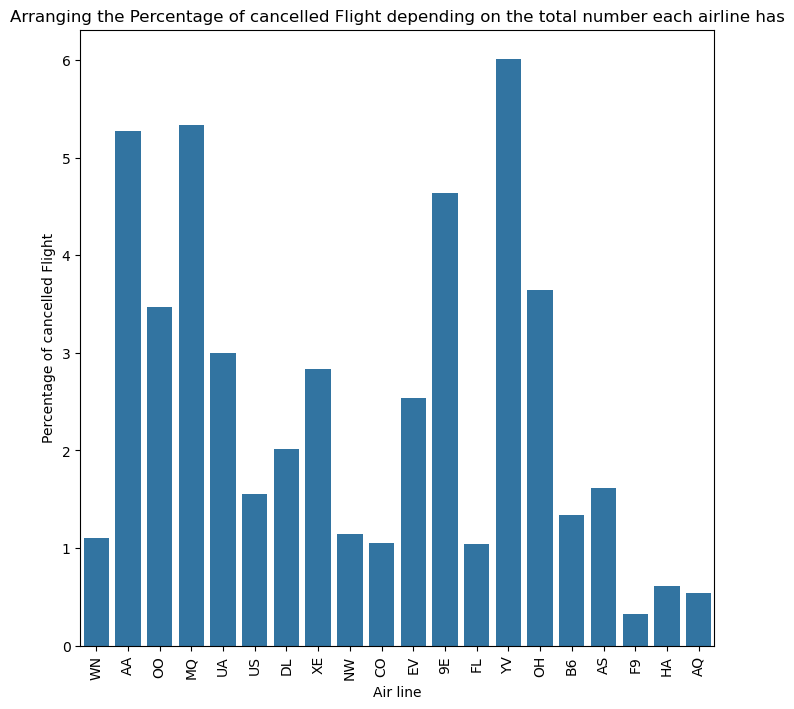

In [18]:
plt.figure(figsize = [18, 8])
plt.subplot(1,2,2) # we have one row two columns and two plots
carrier_order=df.UniqueCarrier.value_counts().index
sb.barplot(data=cancelled,x='UniqueCarrier',y='Cancelled',order=carrier_order,color=sb.color_palette()[0]);
plt.xticks(rotation=90);
plt.title('Arranging the Percentage of cancelled Flight depending on the total number each airline has');
plt.xlabel('Air line')
plt.ylabel('Percentage of cancelled Flight');

The most successful companies have lower cancellation percentage 


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I saw that successful companies are attracting a more customers with a reasonable delay time and they cancel less flights than most of other companies

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> On the start of weekend and and on its end looks we have more departure delay than the weekend 


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

###    Which delay factors has the highest effect on flight delays?



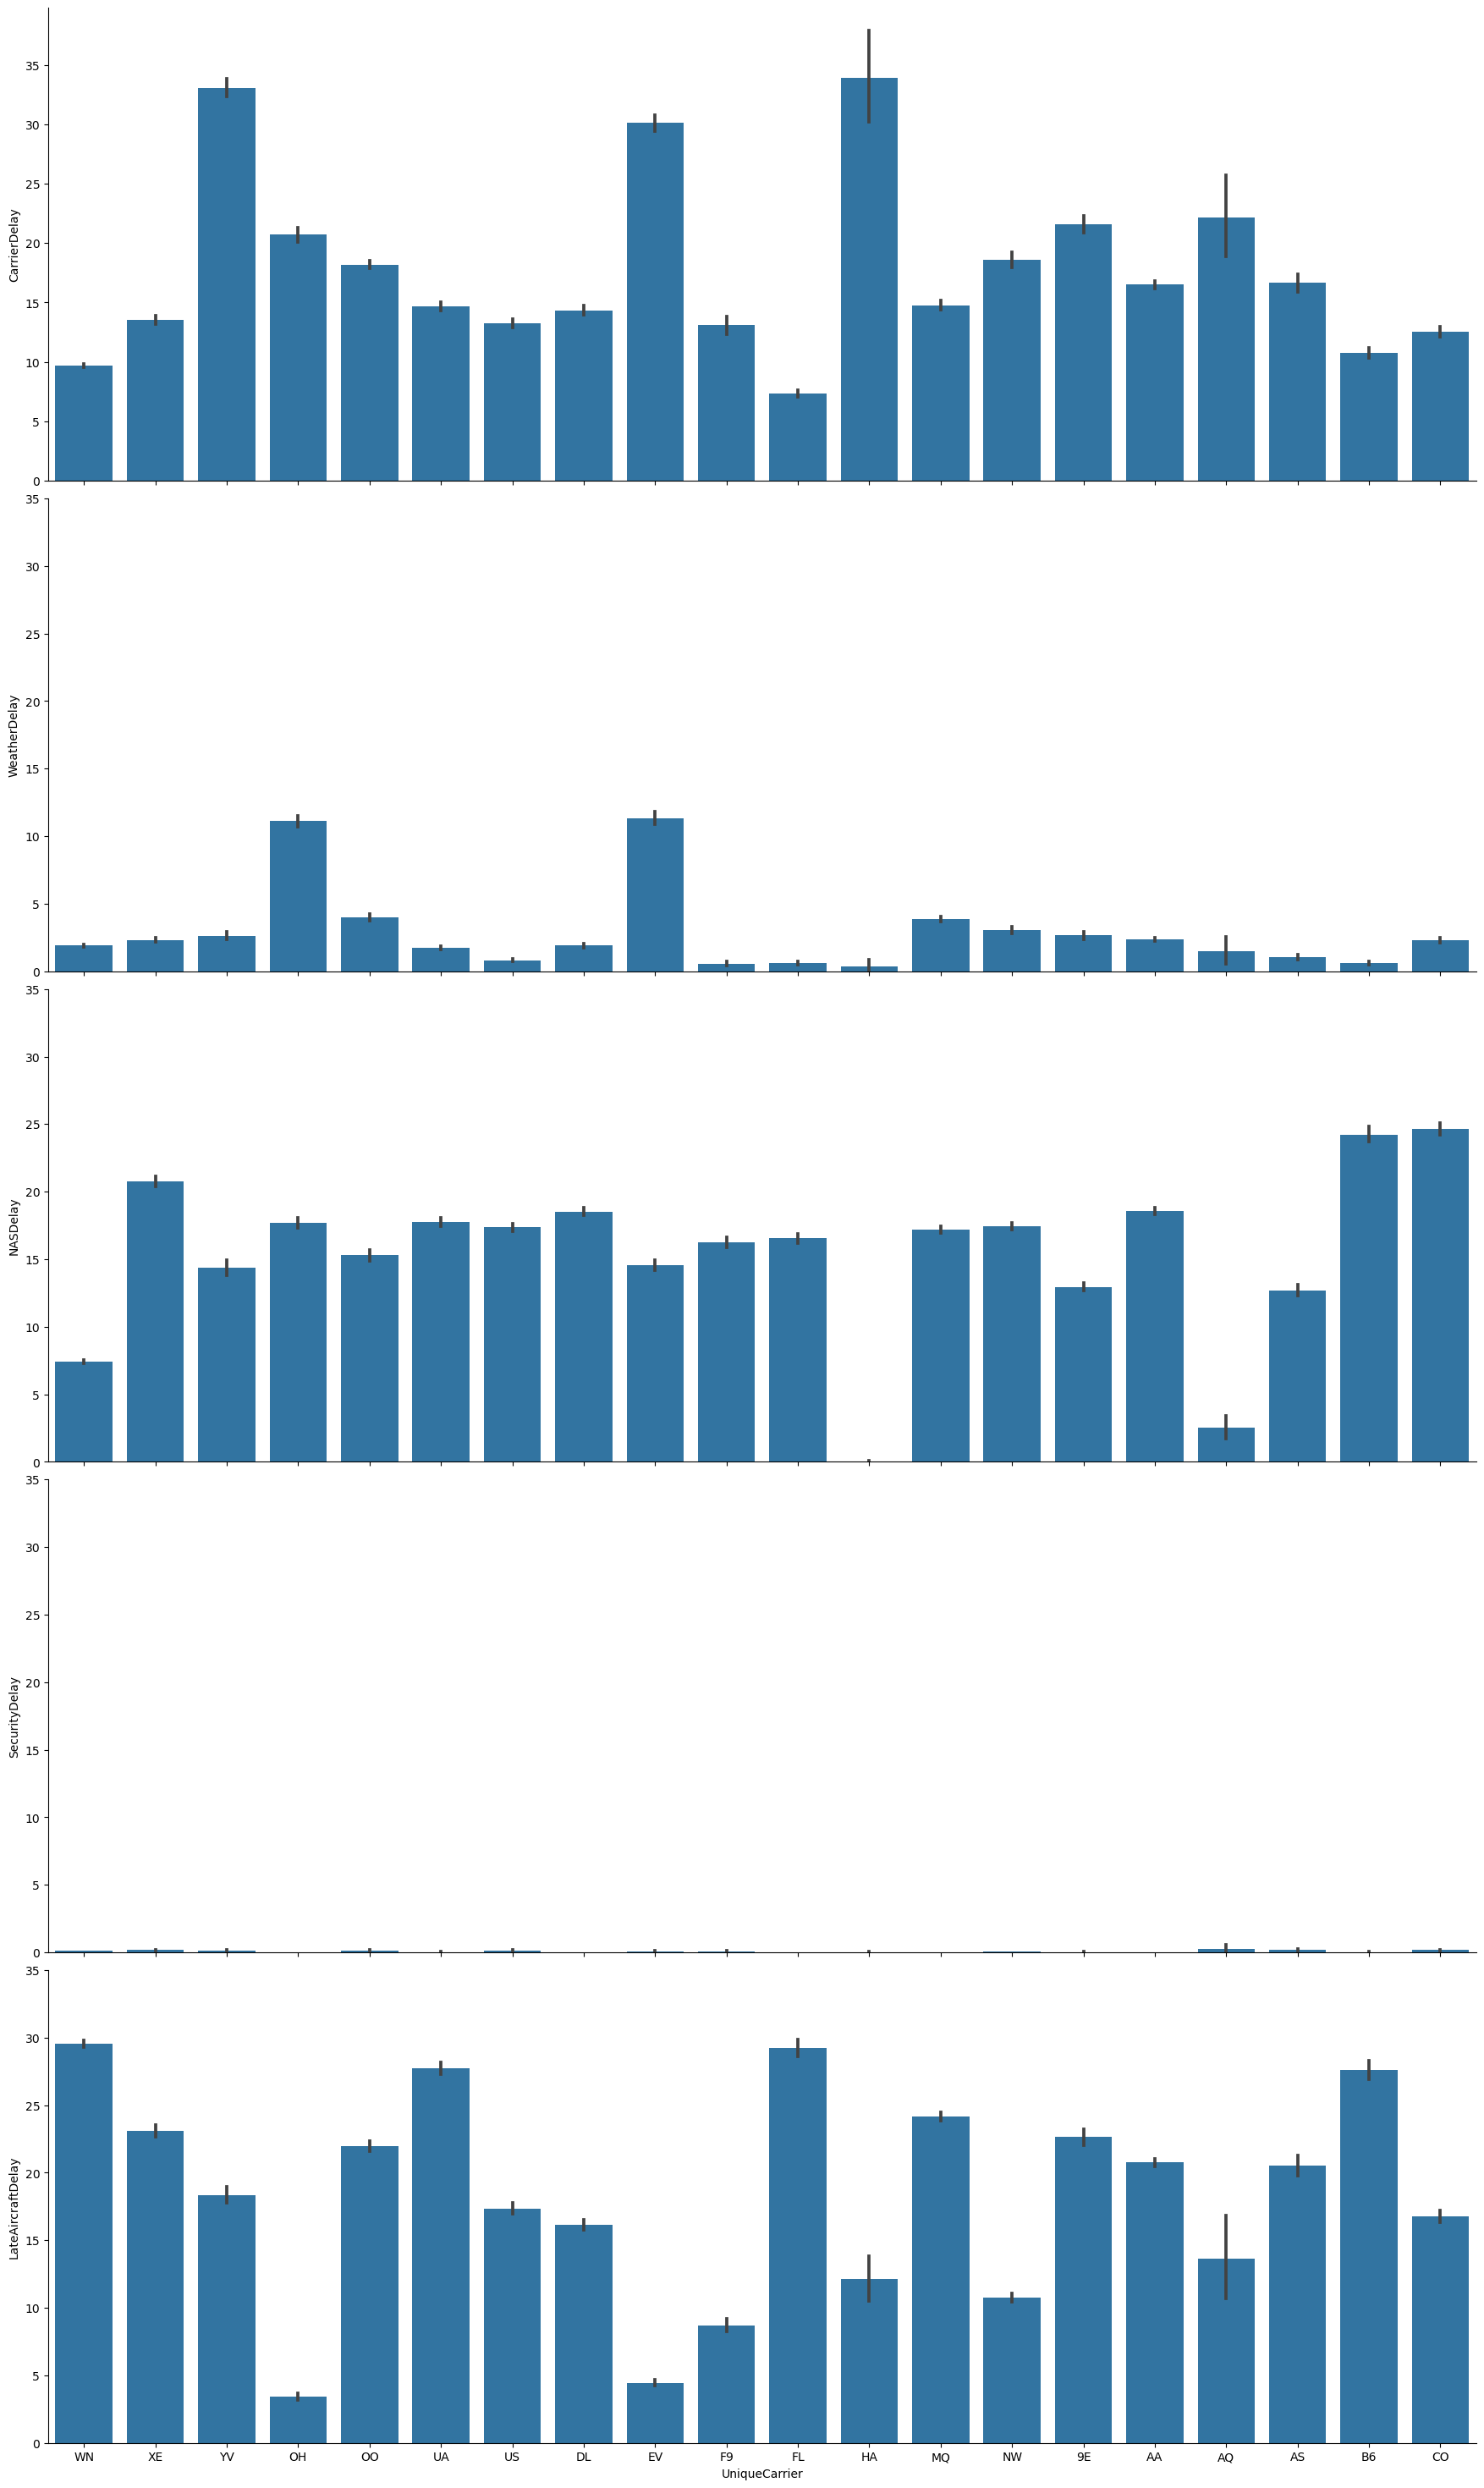

In [19]:
base_color = sb.color_palette()[0]
yticks = np.arange(0, 40, 5)
g = sb.PairGrid(data = df, x_vars = ['UniqueCarrier'],
                y_vars = ['CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], 
                aspect=3, height=6, dropna=True)
g.map(sb.barplot, color=base_color)
g.set(yticks=yticks, yticklabels=yticks);

Security delay and weather delay  have lower average delay time than other causes. we can see also that EV and OH obviously have longer average weather delay time.



### EV and OH have more flights from which airports

<AxesSubplot:xlabel='Origin', ylabel='count'>

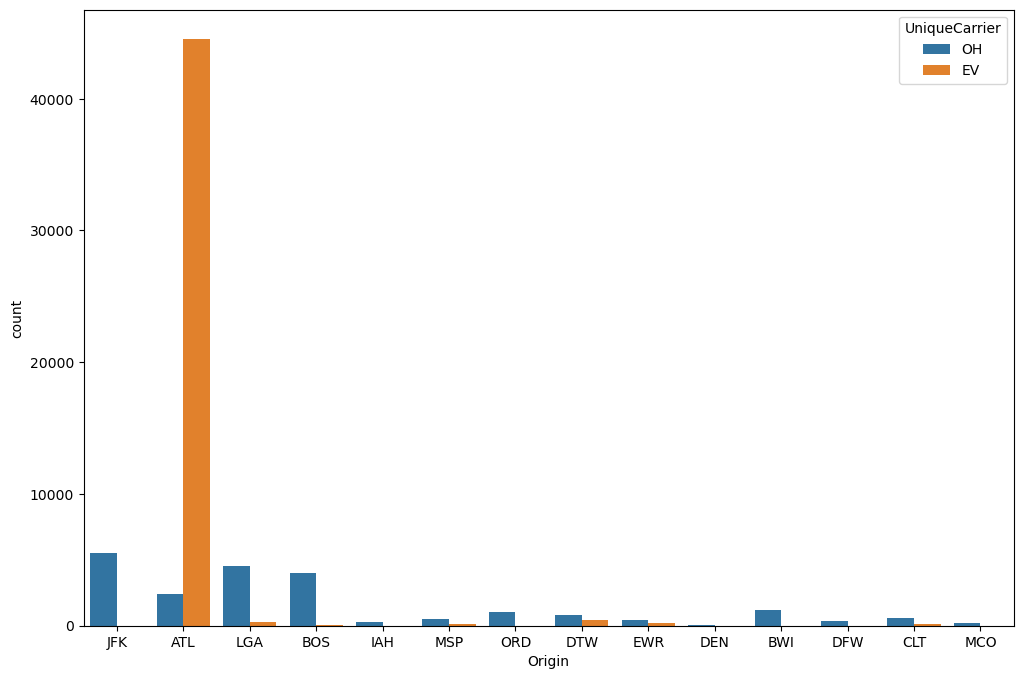

In [20]:
top20_ind = df.Origin.value_counts().head(20).index
top20 = df.loc[df.Origin.isin(top20_ind)]
plt.figure(figsize=[12,8])
sb.countplot(data=top20.loc[(top20.UniqueCarrier=="OH")|(top20.UniqueCarrier=="EV")], 
            x="Origin", hue="UniqueCarrier")

EV has d high amount of flights from ATL while OH's flights are more diverse.

<AxesSubplot:xlabel='Origin', ylabel='WeatherDelay'>

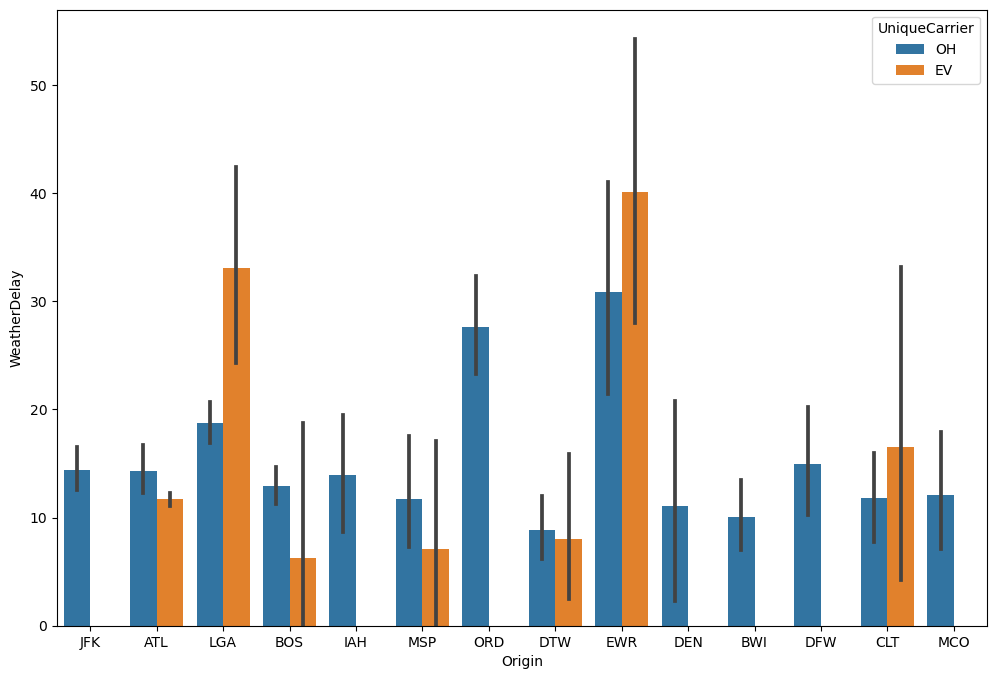

In [21]:
plt.figure(figsize=[12,8])
sb.barplot(data=top20.loc[(top20.UniqueCarrier=="OH")|(top20.UniqueCarrier=="EV")], 
            x="Origin", y="WeatherDelay", hue="UniqueCarrier")

this plot show that in EWR airport weatherdelay in both of OH and EV is longer than other airports 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I am primarily interested in studying the connection between carriers, airports, and delays. While discussing various causes of delays in this section, I found that carrier delay and weather delay are relatively easier to comprehend compared to other factors. After analyzing the correlation between carriers and delays, I did not find any significant trends. However, when I specifically examined carrier delay, YV, EV, and HA carriers had longer carrier delay times compared to others. On the other hand, OH and EV carriers had higher average carrier delay times for weather-related delays.

### Were there any interesting or surprising interactions between features?

> Initially, I believed that the main factor causing weather delays was the origin of the flights, as some airports might be located in areas with severe weather conditions. However, my findings revealed that this was only partially true and did not provide the complete explanation. For instance, while "EV" and "OH" carriers had significantly higher average weather delays at EWR airport, the overall average weather delay at EWR airport for all carriers was comparatively shorter. Therefore, there must be some other factor contributing to the delays.

## Conclusions
>The carrier is the number one cause for flight cancellation, shortly followed by the weather. The gap in between both of them is very close. NAS is the third highest reason for flight cancellation. No flight cancellations have been reported because of security. I assume that security is good in this airline and we can not controle the weather .
> I saw that successful companies are attracting a more customers with a reasonable delay time and they cancel less flights than most of other companies 
> On the start of weekend and and on its end looks we have more departure delay than the weekend
>the airport place may affect the weather delay but there must be some other factor contributing to delays